### importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

### Importing data set

In [2]:
salary_hike = pd.read_csv('/home/suraj/Downloads/Assignments/Assignment-4/Salary_Data.csv')
salary_hike

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Initial Analysis

In [3]:
salary_hike.shape

(30, 2)

In [4]:
salary_hike.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
salary_hike.dtypes

YearsExperience    float64
Salary             float64
dtype: object

### Assumption check

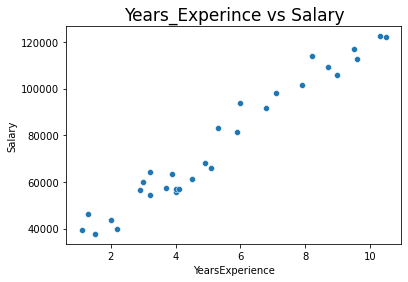

In [8]:
sns.scatterplot(x = 'YearsExperience', y = 'Salary', data = salary_hike)
plt.title('Years_Experince vs Salary',size = 17)
plt.show()

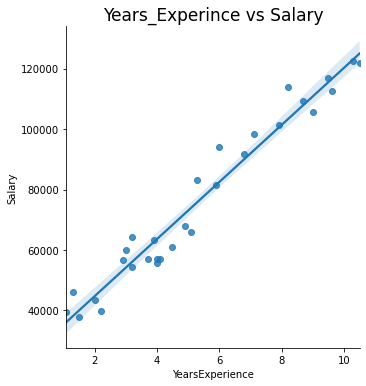

In [9]:
sns.lmplot(x = 'YearsExperience', y = 'Salary', data = salary_hike)
plt.title('Years_Experince vs Salary',size = 17)
plt.show()

In [10]:
salary_hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


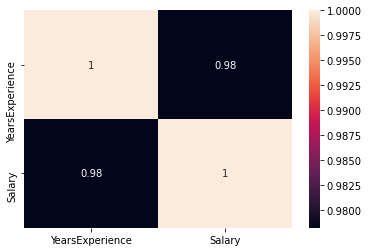

In [11]:
sns.heatmap(salary_hike.corr(),annot=True)
plt.show()

### Model building

In [14]:
linear_model = smf.ols('Salary~YearsExperience',data = salary_hike).fit()

### Model testing

In [15]:
linear_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [16]:
linear_model.tvalues, linear_model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [17]:
linear_model.rsquared, linear_model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

### Model prediction

In [20]:
# Manual prediction 5 years experience
delivery_pred = (25792.200199) + (9449.962321)*(5)
delivery_pred

73042.01180400001

In [21]:
# Automatic Prediction 5,7,9 years experience
new_data=pd.Series([5,7,9])
new_data

0    5
1    7
2    9
dtype: int64

In [26]:
test_data = pd.DataFrame(new_data, columns=['YearsExperience'])
test_data

,YearsExperience
0,5
1,7
2,9


In [27]:
linear_model.predict(test_data)

0     73042.011806
1     91941.936449
2    110841.861092
dtype: float64